In [2]:
import numpy as np
import pandas as pd

Data preparation

In [77]:
acads = pd.read_csv("sample_data/acads1.csv")

In [78]:
advertisement = pd.read_csv("sample_data/advertisements1.csv")

In [79]:
alerts = pd.read_csv("sample_data/alerts1.csv")

In [80]:
work = pd.read_csv("sample_data/work1.csv")

In [81]:
network = pd.read_csv("sample_data/network1.csv")

In [82]:
miscellaneous = pd.read_csv("sample_data/miscellaneous1.csv")

In [87]:
x = np.arange(acads.shape[0])
label = ["acads" for t in x]
acads['Label'] = label
x = np.arange(advertisement.shape[0])
label = ["advertisements" for t in x]
advertisement['Label'] = label
x = np.arange(announcements.shape[0])
label = ["alerts" for t in x]
alerts['Label'] = label
x = np.arange(evals.shape[0])
label = ["work" for t in x]
work['Label'] = label
x = np.arange(social.shape[0])
label = ["network" for t in x]
network['Label'] = label
x = np.arange(miscellaneous.shape[0])
label = ["miscellaneous" for t in x]
miscellaneous['Label'] = label

In [88]:
alerts = alerts[['Subject','Body','Label']]
miscellaneous = miscellaneous[['Subject', 'Body','Label']]
acads = acads[['Subject','Body','Label']]
advertisement = advertisement[['Subject','Body','Label']]
work = work[['Subject','Body','Label']]
network = network[['Subject','Body','Label']]

In [89]:
frames = [acads, advertisement, alerts, work, network, miscellaneous]
dataset = pd.concat(frames)

In [90]:
dataset = dataset.dropna(axis = 0)
dataset


,Subject,Body,Label
0,Fwd:,\r\n\r\n---------- Forwarded message ---------...,acads
1,11511001123_MATH F213_AUG_2021: mettl link update,11511001123_MATH F213_AUG_2021 <https://naland...,acads
2,11511001123_MATH F213_AUG_2021: mettl link,11511001123_MATH F213_AUG_2021 <https://naland...,acads
3,11511002433_BITS F451_AUG_2021: Remaining mid-...,11511002433_BITS F451_AUG_2021 <https://naland...,acads
4,11511001123_MATH F213_AUG_2021: Seating arrang...,11511001123_MATH F213_AUG_2021 <https://naland...,acads
...,...,...,...
130,Re:,"Hi Abdul,\r\n\r\nWe have received the second i...",miscellaneous
136,Document from Abdul Razzaq,AdmitCard-210310453927.pdf \r\n,miscellaneous
140,Document from Abdul Razzaq,CN HOME ASSIGNMENT.pdf \r\n,miscellaneous
141,Document from Abdul Razzaq,CN HOME ASSIGNMENT.pdf \r\n,miscellaneous


In [91]:
data = pd.DataFrame(dataset['Subject']+dataset['Body'])
data

,0
0,Fwd:\r\n\r\n---------- Forwarded message -----...
1,11511001123_MATH F213_AUG_2021: mettl link upd...
2,11511001123_MATH F213_AUG_2021: mettl link1151...
3,11511002433_BITS F451_AUG_2021: Remaining mid-...
4,11511001123_MATH F213_AUG_2021: Seating arrang...
...,...
130,"Re:Hi Abdul,\r\n\r\nWe have received the secon..."
136,Document from Abdul RazzaqAdmitCard-2103104539...
140,Document from Abdul RazzaqCN HOME ASSIGNMENT.p...
141,Document from Abdul RazzaqCN HOME ASSIGNMENT.p...


In [92]:
data['Label'] = dataset['Label']

In [95]:
data.columns = ['Text', 'Label']

In [105]:
data_shuffled = data.sample(frac = 1)
data_shuffled.head()
df = data_shuffled.reset_index(drop=True)

In [106]:
df.head()

,Text,Label
0,11511001123_MATH F213_AUG_2021: Quiz 1 announc...,acads
1,Fresher Jobs recently postedHere are your netw...,alerts
2,11511001334_BITS F312_AUG_2021: Slides on ANN-...,alerts
3,Notice for Meera ResidentsSOCIETY FOR STUDENT ...,work
4,New Course Announcement: Applied Coding TrackP...,alerts


Text Preprocessing

In [107]:
df['Text'][0]

'11511001123_MATH F213_AUG_2021: Quiz 1 announcement11511001123_MATH F213_AUG_2021 <https://nalanda-aws.bits-pilani.ac.in/course/view.php?id=3138>  » Forums <https://nalanda-aws.bits-pilani.ac.in/mod/forum/index.php?id=3138>  » Announcements <https://nalanda-aws.bits-pilani.ac.in/mod/forum/view.php?f=5016>  » Quiz 1 announcement <https://nalanda-aws.bits-pilani.ac.in/mod/forum/discuss.php?d=2317>  \r\n <https://nalanda-aws.bits-pilani.ac.in/user/view.php?id=5657&course=3138>  \tQuiz 1 announcement \r\nby Pradipkumar Haribhau Keskar . <https://nalanda-aws.bits-pilani.ac.in/user/view.php?id=5657&course=3138>  - Sunday, 26 September 2021, 11:01 AM \r\n  \t\r\nThere is a change in plan regarding conduction of Quiz 1. \r\n\r\n1.       Quiz 1 will be an announced quiz. It will be conducted on Friday, 1-10-2021 at 10.00 AM (the regular class time).\r\n\r\n2.       The syllabus of the quiz 1 will be Module 1 (Lectures 1-5) of the handout, this is Sections 1.4, 1.5 and 1.6 of the text).\r\n\r\n

In [108]:
# Converting all to small chars
df['Text'] = df['Text'].str.lower()
df['Text'][0]

'11511001123_math f213_aug_2021: quiz 1 announcement11511001123_math f213_aug_2021 <https://nalanda-aws.bits-pilani.ac.in/course/view.php?id=3138>  » forums <https://nalanda-aws.bits-pilani.ac.in/mod/forum/index.php?id=3138>  » announcements <https://nalanda-aws.bits-pilani.ac.in/mod/forum/view.php?f=5016>  » quiz 1 announcement <https://nalanda-aws.bits-pilani.ac.in/mod/forum/discuss.php?d=2317>  \r\n <https://nalanda-aws.bits-pilani.ac.in/user/view.php?id=5657&course=3138>  \tquiz 1 announcement \r\nby pradipkumar haribhau keskar . <https://nalanda-aws.bits-pilani.ac.in/user/view.php?id=5657&course=3138>  - sunday, 26 september 2021, 11:01 am \r\n  \t\r\nthere is a change in plan regarding conduction of quiz 1. \r\n\r\n1.       quiz 1 will be an announced quiz. it will be conducted on friday, 1-10-2021 at 10.00 am (the regular class time).\r\n\r\n2.       the syllabus of the quiz 1 will be module 1 (lectures 1-5) of the handout, this is sections 1.4, 1.5 and 1.6 of the text).\r\n\r\n

In [109]:
# Removing punctuations
import string
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
df['Text'] = df['Text'].apply(lambda text: remove_punctuation(text))
df['Text'][0]

'11511001123math f213aug2021 quiz 1 announcement11511001123math f213aug2021 httpsnalandaawsbitspilaniacincourseviewphpid3138  » forums httpsnalandaawsbitspilaniacinmodforumindexphpid3138  » announcements httpsnalandaawsbitspilaniacinmodforumviewphpf5016  » quiz 1 announcement httpsnalandaawsbitspilaniacinmodforumdiscussphpd2317  \r\n httpsnalandaawsbitspilaniacinuserviewphpid5657course3138  \tquiz 1 announcement \r\nby pradipkumar haribhau keskar  httpsnalandaawsbitspilaniacinuserviewphpid5657course3138   sunday 26 september 2021 1101 am \r\n  \t\r\nthere is a change in plan regarding conduction of quiz 1 \r\n\r\n1       quiz 1 will be an announced quiz it will be conducted on friday 1102021 at 1000 am the regular class time\r\n\r\n2       the syllabus of the quiz 1 will be module 1 lectures 15 of the handout this is sections 14 15 and 16 of the text\r\n\r\n3       the quiz will be conducted on mettl platform there is no need to log in google meet or google classroom\r\n\r\n4       the

In [110]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [111]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['Text']=df['Text'].apply(lambda text: remove_stopwords(text))
df['Text'][0]


'11511001123math f213aug2021 quiz 1 announcement11511001123math f213aug2021 httpsnalandaawsbitspilaniacincourseviewphpid3138 » forums httpsnalandaawsbitspilaniacinmodforumindexphpid3138 » announcements httpsnalandaawsbitspilaniacinmodforumviewphpf5016 » quiz 1 announcement httpsnalandaawsbitspilaniacinmodforumdiscussphpd2317 httpsnalandaawsbitspilaniacinuserviewphpid5657course3138 quiz 1 announcement pradipkumar haribhau keskar httpsnalandaawsbitspilaniacinuserviewphpid5657course3138 sunday 26 september 2021 1101 change plan regarding conduction quiz 1 1 quiz 1 announced quiz conducted friday 1102021 1000 regular class time 2 syllabus quiz 1 module 1 lectures 15 handout sections 14 15 16 text 3 quiz conducted mettl platform need log google meet google classroom 4 link mettl sent advance logged mettl mercer videos 1000 remain till asked leave google form link quiz provided announcement section mettl 5 quiz closed book strict action taken anyone found consulting others referring material

In [112]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
df['Text']=df['Text'].apply(lambda text: stem_words(text))
df['Text'][0]

'11511001123math f213aug2021 quiz 1 announcement11511001123math f213aug2021 httpsnalandaawsbitspilaniacincourseviewphpid3138 » forum httpsnalandaawsbitspilaniacinmodforumindexphpid3138 » announc httpsnalandaawsbitspilaniacinmodforumviewphpf5016 » quiz 1 announc httpsnalandaawsbitspilaniacinmodforumdiscussphpd2317 httpsnalandaawsbitspilaniacinuserviewphpid5657course3138 quiz 1 announc pradipkumar haribhau keskar httpsnalandaawsbitspilaniacinuserviewphpid5657course3138 sunday 26 septemb 2021 1101 chang plan regard conduct quiz 1 1 quiz 1 announc quiz conduct friday 1102021 1000 regular class time 2 syllabu quiz 1 modul 1 lectur 15 handout section 14 15 16 text 3 quiz conduct mettl platform need log googl meet googl classroom 4 link mettl sent advanc log mettl mercer video 1000 remain till ask leav googl form link quiz provid announc section mettl 5 quiz close book strict action taken anyon found consult other refer materi onlin offlin 6 weightag quiz 1 35 mark time allot 30 minut p h kes

In [113]:
df

,Text,Label
0,11511001123math f213aug2021 quiz 1 announcemen...,acads
1,fresher job recent postedher network highlight...,alerts
2,11511001334bit f312aug2021 slide ann8115110013...,alerts
3,notic meera residentssocieti student mess serv...,work
4,new cours announc appli code trackplac hi folk...,alerts
...,...,...
1128,📷 ishita singhal recent post new photo abdul h...,network
1129,13 new job research assistantview job asia ‌ ‌...,alerts
1130,item share dme class f314mf f314 20210930 2237...,alerts
1131,reinforc brand imageread new post blog design ...,advertisements


In [114]:
import re
def remove_special(text):
    text = re.sub(r"»",'',text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'http\S+', ' ', text)
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
    text = re.sub(r'[0-9]',' ',text)
#    text = text.strip('\n')
    text = text.strip('\\')
    text=re.sub('[^A-Za-z0-9]+', ' ', text)
    text=re.sub(r"\([^()]*\)", " ", text)
    text = text.strip('')
    return text
df['Text'] = df['Text'].apply(lambda text: remove_special(text))
df['Text'][0]
# a=remove_special("abkjbdf/7327dc( jg55kb/db )jgv1255")
# b=remove_special("electr machin (eee f211/instr f211)")


# print(a)
# print(b)

' math f aug quiz announcement math f aug forum announc quiz announc quiz announc pradipkumar haribhau keskar sunday septemb chang plan regard conduct quiz quiz announc quiz conduct friday regular class time syllabu quiz modul lectur handout section text quiz conduct mettl platform need log googl meet googl classroom link mettl sent advanc log mettl mercer video remain till ask leav googl form link quiz provid announc section mettl quiz close book strict action taken anyon found consult other refer materi onlin offlin weightag quiz mark time allot minut p h keskar ic math f see post context chang forum digest prefer read email download mobil app receiv notif mobil devic '

In [115]:
df['Text'][0]

' math f aug quiz announcement math f aug forum announc quiz announc quiz announc pradipkumar haribhau keskar sunday septemb chang plan regard conduct quiz quiz announc quiz conduct friday regular class time syllabu quiz modul lectur handout section text quiz conduct mettl platform need log googl meet googl classroom link mettl sent advanc log mettl mercer video remain till ask leav googl form link quiz provid announc section mettl quiz close book strict action taken anyon found consult other refer materi onlin offlin weightag quiz mark time allot minut p h keskar ic math f see post context chang forum digest prefer read email download mobil app receiv notif mobil devic '

Label Encoding

In [116]:
from sklearn import preprocessing

In [117]:
label_encoder = preprocessing.LabelEncoder()

In [118]:
df['Label'].unique()

array(['acads', 'alerts', 'work', 'miscellaneous', 'advertisements',
       'network'], dtype=object)

In [119]:
df['Label'] = label_encoder.fit_transform(df['Label'])
df['Label'].unique()

array([0, 2, 5, 3, 1, 4])

In [120]:
df['Label'].describe()

count    1133.000000
mean        2.372462
std         1.790932
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Label, dtype: float64

In [121]:
df['Label'].value_counts()

0    226
1    214
4    203
2    200
5    196
3     94
Name: Label, dtype: int64

In [122]:
df.head(50)

,Text,Label
0,math f aug quiz announcement math f aug forum...,0
1,fresher job recent postedher network highlight...,2
2,bit f aug slide ann bit f aug forum announc s...,2
3,notic meera residentssocieti student mess serv...,5
4,new cours announc appli code trackplac hi folk...,2
5,new job analystview job north america abdul r...,2
6,student leav report portaldear colleagu refer ...,0
7,new job analyst view job hyderabad telangana ...,2
8,regard studi projectsir could pleas give permi...,3
9,commun digest fri oct commun digest fri oct ta...,5


Splitting training and testing

In [123]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Label'], test_size = 0.3, random_state = 20)

Feature Extraction

In [124]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(ngram_range=(1,4))
cv.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 4), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [125]:
X_train_transformed = cv.transform(X_train)
# X_train_transformed = X_train_transformed.toarray()
type(X_train_transformed)

scipy.sparse.csr.csr_matrix

Model Selection

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from time import perf_counter
import warnings

In [128]:
# DECISION TREE 
from sklearn.metrics import accuracy_score
start = perf_counter()
DT=DecisionTreeClassifier()
DT.fit(X_train_transformed, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"DECISION TREE trained in {duration}")
X_test_transformed = cv.transform(X_test)
y_pred=DT.predict(X_test_transformed)
DT_accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(DT.score(X_test_transformed,y_test))


DECISION TREE trained in 1.6
0.8558823529411764
0.8558823529411764


In [129]:
#SVM(Linear)
lvm=LinearSVC()
lvm.fit(X_train_transformed, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"LINEAR SVM trained in {duration}")
X_test_transformed = cv.transform(X_test)
y_pred=lvm.predict(X_test_transformed)
lvm_accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(lvm.score(X_test_transformed,y_test))



LINEAR SVM trained in 12.94
0.9176470588235294
0.9176470588235294


In [130]:
# RBF SVM
rbf_svm=SVC()
rbf_svm.fit(X_train_transformed, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"RBF SVM trained in {duration}")
X_test_transformed = cv.transform(X_test)
y_pred=rbf_svm.predict(X_test_transformed)
rbf_svm_accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(rbf_svm.score(X_test_transformed,y_test))






RBF SVM trained in 49.08
0.888235294117647
0.888235294117647


In [131]:
#Multinomial NB
MNB=MultinomialNB()
MNB.fit(X_train_transformed,y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"MNB trained in {duration}")
X_test_transformed = cv.transform(X_test)
y_pred=MNB.predict(X_test_transformed)
mnb_accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(MNB.score(X_test_transformed,y_test))



MNB trained in 98.83
0.888235294117647
0.888235294117647


In [132]:
model_accuracy=[]
model_accuracy.append(("DecisionTree",DT_accuracy))
model_accuracy.append(("Linear SVM",lvm_accuracy))
model_accuracy.append(("RBF SVM",rbf_svm_accuracy))
model_accuracy.append(("Multinomial NB",mnb_accuracy))

In [133]:
model_accuracy=pd.DataFrame(model_accuracy)
model_accuracy.columns=['Model','Accuracy on Test data']
model_accuracy

,Model,Accuracy on Test data
0,DecisionTree,0.855882
1,Linear SVM,0.917647
2,RBF SVM,0.888235
3,Multinomial NB,0.888235


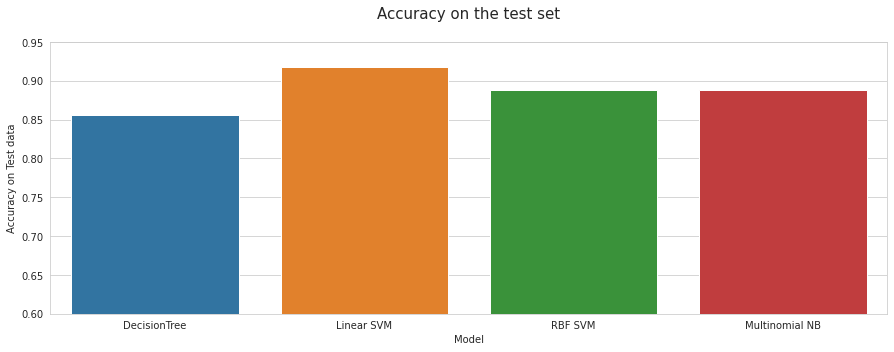

In [135]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Accuracy on Test data', data = model_accuracy)
#sns.barplot(x = 'Model', y ='Accuracy on Test data', data = model_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.6,0.95)
plt.show()

In [136]:
#Feature extraction using BOW

cv_bow=CountVectorizer(ngram_range=(1,4))
cv_bow.fit(X_train)
X_train_transformed_bow = cv.transform(X_train)




In [137]:
#DecisionTree with Bag of Words
DT_bow=DecisionTreeClassifier()
DT_bow.fit(X_train_transformed, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"DECISION TREE trained in {duration}")
X_test_transformed_bow = cv_bow.transform(X_test)
y_pred=DT_bow.predict(X_test_transformed_bow)
DT_bow_accuracy=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(DT_bow.score(X_test_transformed_bow,y_test))

DECISION TREE trained in 148.33
0.8058823529411765
0.8058823529411765


In [138]:
#SVM(Linear)
lvm_bow=LinearSVC()
lvm_bow.fit(X_train_transformed_bow, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"LINEAR SVM trained in {duration}")
X_test_transformed_bow = cv_bow.transform(X_test)
y_pred=lvm_bow.predict(X_test_transformed_bow)
lvm_accuracy_bow=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(lvm.score(X_test_transformed_bow,y_test))



LINEAR SVM trained in 150.49
0.9235294117647059
0.9235294117647059


In [139]:
# RBF SVM
#SVM(Linear)
rbf_svm_bow=SVC()
rbf_svm_bow.fit(X_train_transformed_bow, y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"RBF SVM trained in {duration}")
X_test_transformed_bow = cv_bow.transform(X_test)
y_pred=rbf_svm_bow.predict(X_test_transformed_bow)
rbf_svm_accuracy_bow=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(rbf_svm_bow.score(X_test_transformed_bow,y_test))






RBF SVM trained in 154.61
0.17058823529411765
0.17058823529411765


In [140]:
#Multinomial NB
MNB_bow=MultinomialNB()
MNB_bow.fit(X_train_transformed_bow,y_train)
duration = perf_counter() - start
duration = round(duration,2)
print(f"MNB trained in {duration}")
X_test_transformed_bow = cv_bow.transform(X_test)
y_pred=MNB_bow.predict(X_test_transformed_bow)
mnb_accuracy_bow=accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(MNB_bow.score(X_test_transformed_bow,y_test))



MNB trained in 158.59
0.8823529411764706
0.8823529411764706


In [141]:
model_accuracy_bow=[]
model_accuracy_bow.append(("DecisionTree",DT_bow_accuracy))
model_accuracy_bow.append(("Linear SVM",lvm_accuracy_bow))
model_accuracy_bow.append(("RBF SVM",rbf_svm_accuracy_bow))
model_accuracy_bow.append(("Multinomial NB",mnb_accuracy_bow))
model_accuracy_bow
model_accuracy_bow=pd.DataFrame(model_accuracy_bow)
model_accuracy_bow.columns=['Model','Accuracy on Test data']
model_accuracy_bow

,Model,Accuracy on Test data
0,DecisionTree,0.805882
1,Linear SVM,0.923529
2,RBF SVM,0.170588
3,Multinomial NB,0.882353


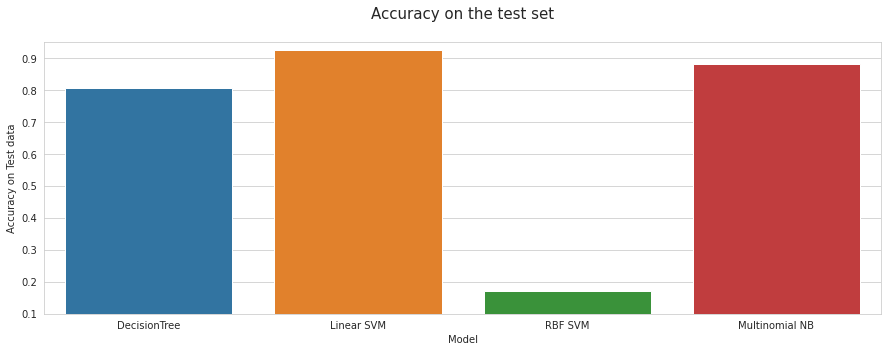

In [143]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'Model', y ='Accuracy on Test data', data = model_accuracy_bow)
#sns.barplot(x = 'Model', y ='Accuracy on Test data', data = model_accuracy)
plt.title('Accuracy on the test set\n', fontsize = 15)
plt.ylim(0.1,0.95)
plt.show()